In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 定义数据加载和预处理函数
def load_data_fashion_mnist(batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# 定义神经网络模型
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 将输入展平为一维向量
        x = torch.relu(self.fc1(x))  # 第一个全连接层，使用ReLU激活函数
        x = self.fc2(x)  # 第二个全连接层，输出10个类别的分数
        return x

# 加载数据并移动到GPU
batch_size = 256
train_loader, test_loader = load_data_fashion_mnist(batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 检测是否有GPU
model = FashionMNISTModel().to(device)  # 创建模型并移动到GPU

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# 定义训练函数
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # 将数据移动到GPU
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# 定义测试函数
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.3f}")

# 训练模型并测试
num_epochs = 25
train(model, train_loader, criterion, optimizer, num_epochs)
test(model, test_loader)


Epoch 1, Loss: 1.4001
Epoch 2, Loss: 0.6159
Epoch 3, Loss: 0.4785
Epoch 4, Loss: 0.4411
Epoch 5, Loss: 0.4000
Epoch 6, Loss: 0.3808
Epoch 7, Loss: 0.3639
Epoch 8, Loss: 0.3512
Epoch 9, Loss: 0.3435
Epoch 10, Loss: 0.3340
Epoch 11, Loss: 0.3214
Epoch 12, Loss: 0.3154
Epoch 13, Loss: 0.3120
Epoch 14, Loss: 0.3057
Epoch 15, Loss: 0.3048
Epoch 16, Loss: 0.2909
Epoch 17, Loss: 0.2909
Epoch 18, Loss: 0.2861
Epoch 19, Loss: 0.2790
Epoch 20, Loss: 0.2742
Epoch 21, Loss: 0.2788
Epoch 22, Loss: 0.2662
Epoch 23, Loss: 0.2648
Epoch 24, Loss: 0.2595
Epoch 25, Loss: 0.2552
Test Accuracy: 0.847


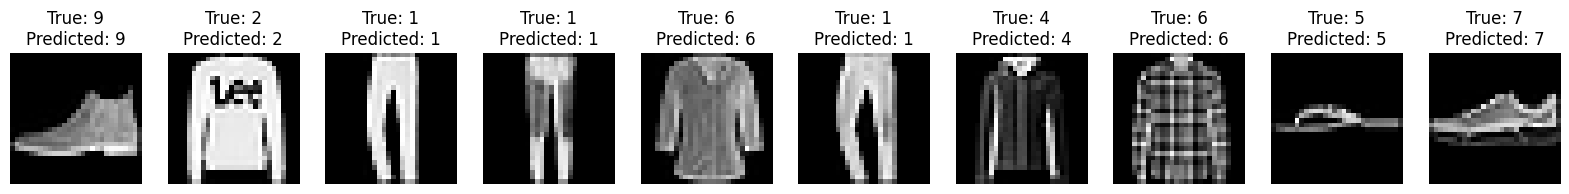

In [5]:
import matplotlib.pyplot as plt
def visualize_predictions(model, test_loader, device, num_images=10):
    model.eval()
    with torch.no_grad():
        fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

        for i, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for j in range(num_images):
                ax = axes[j]
                ax.imshow(images[j].cpu().numpy().squeeze(), cmap='gray')
                ax.set_title(f"True: {labels[j].item()}\nPredicted: {predicted[j].item()}")
                ax.axis('off')

            break  # 只显示第一个批次的部分图像

        plt.show()

# 使用上面训练好的模型和测试集进行可视化预测
visualize_predictions(model, test_loader, device)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

def load_data_fashion_mnist(batch_size):
    # 定义数据预处理的转换
    transform = transforms.Compose([
        transforms.ToTensor(),  # 转换为张量
        transforms.Normalize((0.5,), (0.5,))  # 标准化处理
    ])

    # 加载 Fashion MNIST 数据集
    train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    # 创建数据加载器
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


In [2]:
import torch.nn as nn

class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # 第一个全连接层
        self.fc2 = nn.Linear(256, 10)     # 第二个全连接层

    def forward(self, x):
        x = x.view(x.size(0), -1)        # 展平输入图像
        x = torch.relu(self.fc1(x))       # 第一个全连接层使用ReLU激活函数
        x = self.fc2(x)                   # 第二个全连接层输出类别分数
        return x


In [3]:
import torch.optim as optim

batch_size = 256
train_loader, test_loader = load_data_fashion_mnist(batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionMNISTModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [4]:
import matplotlib.pyplot as plt
# 训练模型并测试
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []  # 存储训练损失
    test_accuracies = []  # 存储测试准确率

    for epoch in range(num_epochs):
        model.train()  # 设置模型为训练模式
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # 在每个 epoch 结束后计算测试集准确率
        model.eval()  # 设置模型为评估模式
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            test_accuracy = correct / total
            test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss:.4f}, Test Accuracy: {test_accuracy:.3f}")

    # 绘制训练损失和测试准确率变化图
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.ylim(0, max(train_losses) * 1.1)  # 设置 y 轴范围，留出一定的空间

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy Over Epochs')
    plt.legend()
    plt.ylim(min(test_accuracies) * 0.9, 1.0)  # 设置 y 轴范围，留出一定的空间

    plt.tight_layout()
    plt.show()



Epoch 1, Train Loss: 0.6694, Test Accuracy: 0.802
Epoch 2, Train Loss: 0.4653, Test Accuracy: 0.825
Epoch 3, Train Loss: 0.4234, Test Accuracy: 0.823
Epoch 4, Train Loss: 0.3956, Test Accuracy: 0.838
Epoch 5, Train Loss: 0.3751, Test Accuracy: 0.846
Epoch 6, Train Loss: 0.3544, Test Accuracy: 0.843
Epoch 7, Train Loss: 0.3427, Test Accuracy: 0.860
Epoch 8, Train Loss: 0.3319, Test Accuracy: 0.850
Epoch 9, Train Loss: 0.3241, Test Accuracy: 0.864
Epoch 10, Train Loss: 0.3153, Test Accuracy: 0.865
Epoch 11, Train Loss: 0.3031, Test Accuracy: 0.850
Epoch 12, Train Loss: 0.2991, Test Accuracy: 0.858
Epoch 13, Train Loss: 0.2897, Test Accuracy: 0.859
Epoch 14, Train Loss: 0.2832, Test Accuracy: 0.855
Epoch 15, Train Loss: 0.2767, Test Accuracy: 0.874
Epoch 16, Train Loss: 0.2730, Test Accuracy: 0.855
Epoch 17, Train Loss: 0.2666, Test Accuracy: 0.881
Epoch 18, Train Loss: 0.2620, Test Accuracy: 0.855
Epoch 19, Train Loss: 0.2561, Test Accuracy: 0.865
Epoch 20, Train Loss: 0.2524, Test Accur

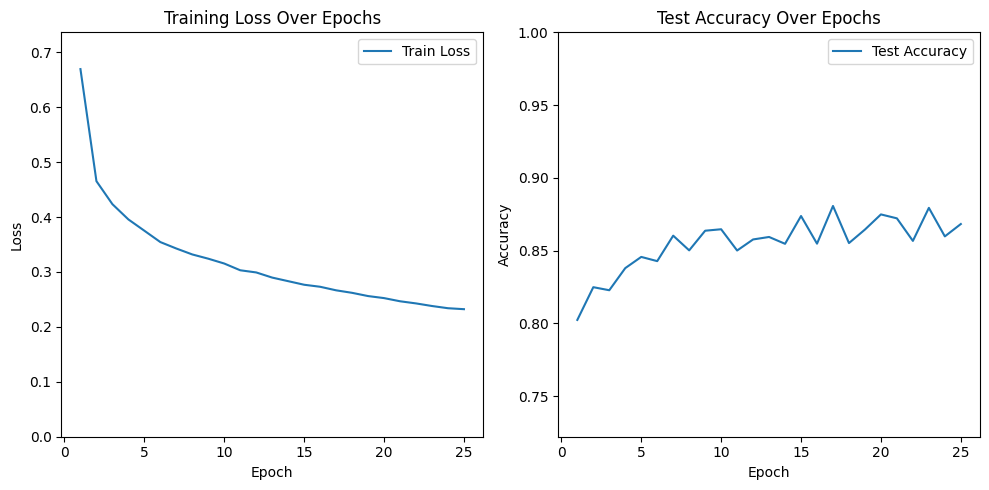

In [5]:
# 使用定义好的函数进行模型训练和评估
num_epochs = 25
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs)


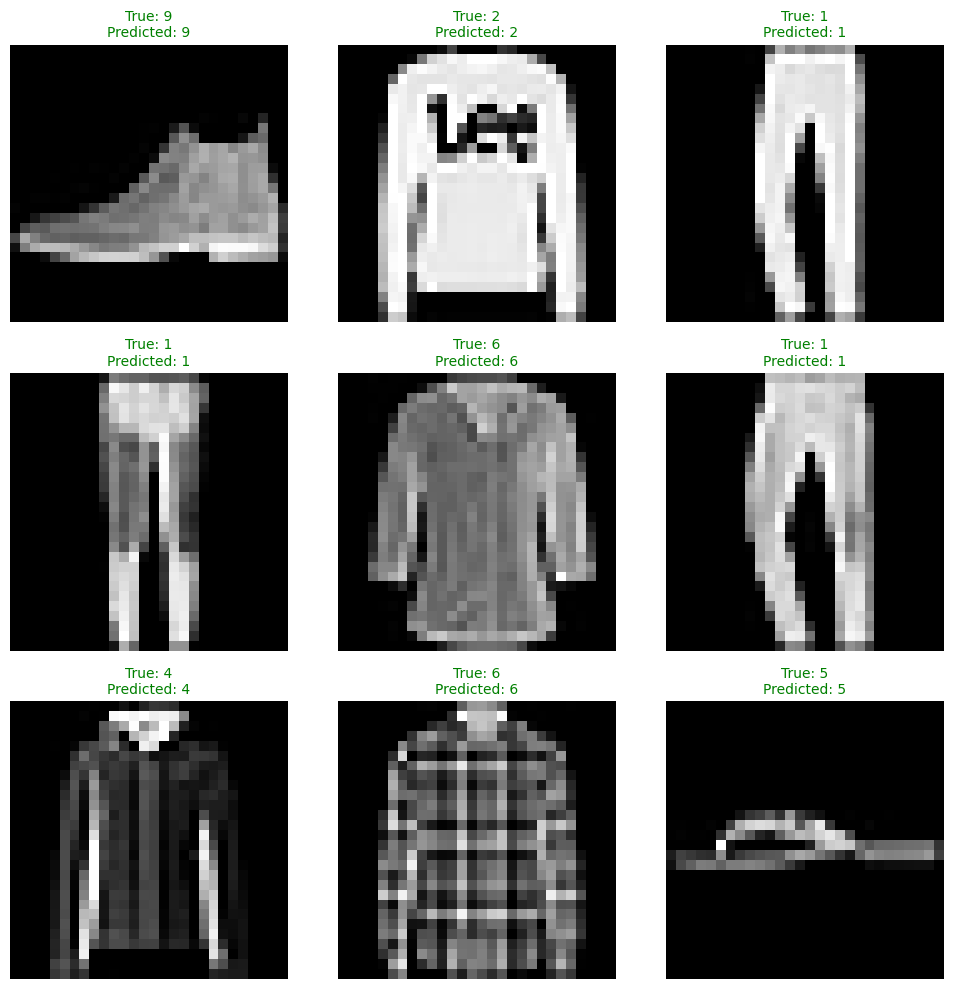

In [7]:
import matplotlib.pyplot as plt

def visualize_predictions(model, test_loader, device, num_images=9):
    model.eval()
    with torch.no_grad():
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))

        for i, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for j in range(num_images):
                row = j // 3
                col = j % 3
                ax = axes[row, col]
                ax.imshow(images[j].cpu().numpy().squeeze(), cmap='gray')
                ax.set_title(f"True: {labels[j].item()}\nPredicted: {predicted[j].item()}", fontsize=10, color='green' if predicted[j] == labels[j] else 'red')
                ax.axis('off')

            break  # 只显示第一个批次的部分图像

        plt.tight_layout()  # 调整子图布局
        plt.show()

# 使用训练好的模型进行可视化预测
visualize_predictions(model, test_loader, device)

